In [4]:
import pandas as pd
import numpy as np
from time import time
from matplotlib import pyplot as plt
from scipy import ndimage
from sklearn import manifold
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.datasets import load_digits
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [16]:
df = pd.read_csv('cluster.csv', sep='\t')

In [17]:
df.head()

,Row,X,Y
0,1,0.0,0.0
1,2,0.1,-0.1
2,3,0.2,-0.2
3,4,0.3,-0.3
4,5,0.4,-0.4


In [18]:
km = KMeans(n_clusters=10)
km

KMeans(n_clusters=10)

In [29]:
y_predicted = km.fit_predict(df)

In [22]:
df['cluster'] = y_predicted
df.to_csv('predicted.csv', index=None)

No handles with labels found to put in legend.


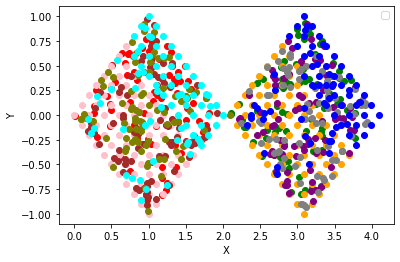

In [23]:
df1 = df[df.cluster == 0]
df2 = df[df.cluster == 1]
df3 = df[df.cluster == 2]
df4 = df[df.cluster == 3]
df5 = df[df.cluster == 4]
df6 = df[df.cluster == 5]
df7 = df[df.cluster == 6]
df8 = df[df.cluster == 7]
df9 = df[df.cluster == 8]
df10 = df[df.cluster == 9]


plt.scatter(df1.X, df1.Y, color='green')
plt.scatter(df2.X, df2.Y, color='red')
plt.scatter(df3.X, df3.Y, color='orange')
plt.scatter(df4.X, df4.Y, color='purple')
plt.scatter(df5.X, df5.Y, color='pink')
plt.scatter(df6.X, df6.Y, color='brown')
plt.scatter(df7.X, df7.Y, color='olive')
plt.scatter(df8.X, df8.Y, color='cyan')
plt.scatter(df9.X, df9.Y, color='gray')
plt.scatter(df10.X, df10.Y, color='blue')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()

In [ ]:
#################### K-Means on Handwritten Digits Dataset ####################

In [137]:
X, y = load_digits(return_X_y=True)

In [138]:
print(digits.data.shape)
print(type(digits))

(1797, 64)
<class 'sklearn.utils.Bunch'>


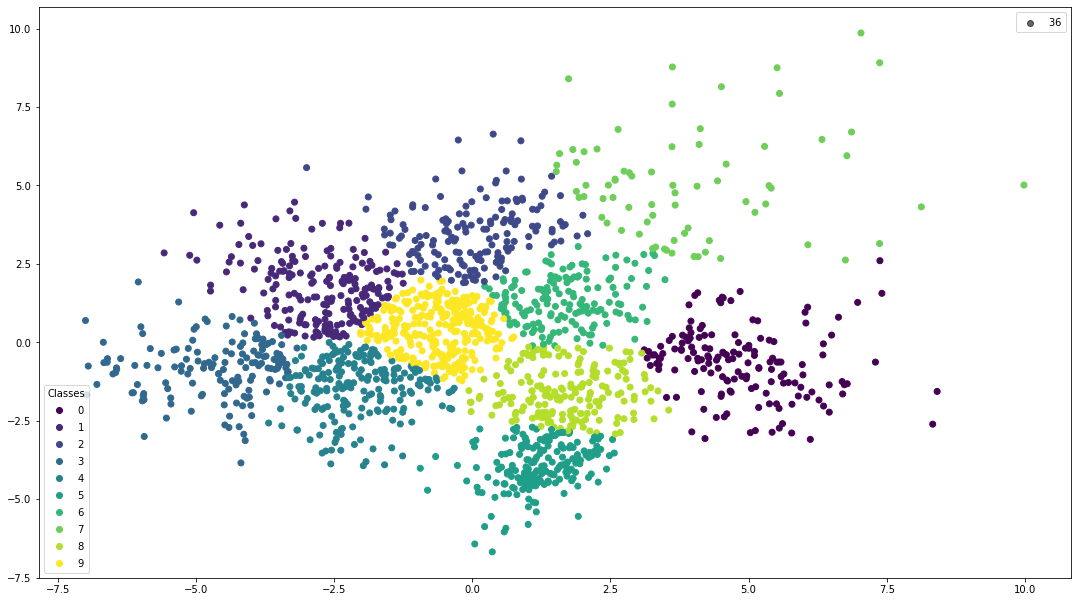

In [161]:
from scipy.spatial import distance
from sklearn.preprocessing import StandardScaler

# data = pd.read_csv('cluster_data.txt', sep='\t')
# df = data.iloc[:, 1:]
# print(extracted_data)

# # print(df)
#
# X = df.values
# sc = StandardScaler()
# sc.fit(X)
X = PCA(n_components=2).fit_transform(X)


def kmeans(X, k=10, max_iterations=100):
    """
    X: multidimensional data
    k: number of clusters
    max_iterations: number of repetitions before clusters are established

    Steps:
    1. Convert data to numpy array
    2. Pick indices of k random point without replacement
    3. Find class (P) of each data point using euclidean distance
    4. Stop when max_iteration are reached of P matrix doesn't change

    Return:
    np.array: containg class of each data point
    """

    if isinstance(X, pd.DataFrame): X = X.values
    idx = np.random.choice(len(X), k, replace=False)
    centroids = X[idx, :]
    P = np.argmin(distance.cdist(X, centroids, 'euclidean'), axis=1)
    for _ in range(max_iterations):
        centroids = np.vstack([X[P == i, :].mean(axis=0) for i in range(k)])
        tmp = np.argmin(distance.cdist(X, centroids, 'euclidean'), axis=1)
        if np.array_equal(P, tmp): break # if the position of the centroids
        P = tmp
    return P


P = kmeans(X)

fig, ax = plt.subplots()
fig.set_size_inches(18.5, 10.5)

scatter = ax.scatter(X[:, 0], X[:, 1], c=P)

# produce a legend with the unique colors from the scatter
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="lower left", title="Classes")
ax.add_artist(legend1)

# produce a legend with a cross section of sizes from the scatter
handles, labels = scatter.legend_elements(prop="sizes", alpha=0.6)
legend2 = ax.legend(handles, labels, loc="upper right", title="Sizes")

plt.show()

In [139]:
reduced_data = PCA(n_components=2).fit_transform(X)
reduced_data.shape

(1797, 2)

In [140]:
y_predicted = km.fit_predict(reduced_data)
len(y_predicted)

1797

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


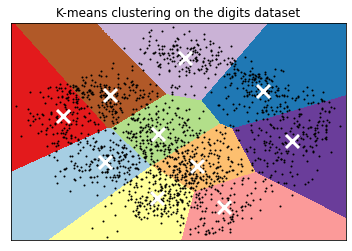

In [141]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = km.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = km.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the digits dataset"
)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [142]:
confusion_matrix(y, y_predicted)

array([[  0,  12,   1,   0,   0,   0, 160,   1,   0,   4],
       [  0,   0,  28,  87,   0,  48,   0,   4,   9,   6],
       [114,   0,  34,   1,   3,  13,   0,   0,   8,   4],
       [ 44,   0,  11,   0,  96,   0,   0,   0,  12,  20],
       [  0,  24,   0,   5,   0,   5,   0, 144,   3,   0],
       [  3,   5,  46,   0,   1,  49,   5,   2,  24,  47],
       [  0, 150,   0,   0,   0,   2,   8,  21,   0,   0],
       [  0,   0,   1,  21,   0,  40,   0,   1, 116,   0],
       [  4,   0,  69,   4,   0,  64,   0,   1,  24,   8],
       [  8,   1,  17,   0,  41,  10,   0,   0,   9,  94]])

In [119]:
#################### Agglomerative Clustering on Handwritten Digits Dataset ####################

In [120]:
X, y = load_digits(return_X_y=True)
n_samples, n_features = X.shape

In [121]:
np.random.seed(0)

In [124]:
def nudge_images(X, y):
    shift = lambda x: ndimage.shift(
        x.reshape((8, 8)), 0.3 * np.random.normal(size=2), mode="constant"
    ).ravel()
    X = np.concatenate([X, np.apply_along_axis(shift, 1, X)])
    Y = np.concatenate([y, y], axis=0)
    return X, Y

In [125]:
X, y = nudge_images(X, y)

In [129]:
def plot_clustering(X_red, labels, title=None):
    x_min, x_max = np.min(X_red, axis=0), np.max(X_red, axis=0)
    X_red = (X_red - x_min) / (x_max - x_min)

    plt.figure(figsize=(6, 4))
    for i in range(X_red.shape[0]):
        plt.text(
            X_red[i, 0],
            X_red[i, 1],
            str(y[i]),
            color=plt.cm.nipy_spectral(labels[i] / 10.0),
            fontdict={"weight": "bold", "size": 9},
        )

    plt.xticks([])
    plt.yticks([])
    if title is not None:
        plt.title(title, size=17)
    plt.axis("off")
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])


In [127]:
print("Computing embedding")
X_red = manifold.SpectralEmbedding(n_components=2).fit_transform(X)
print("Done.")

Computing embedding
Done.


ward :	1.27s
7188


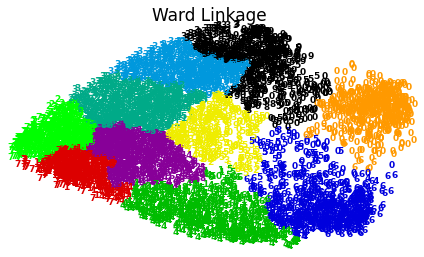

In [133]:
clustering = AgglomerativeClustering(linkage="ward", n_clusters=10)
t0 = time()
clustering.fit(X_red)
print("%s :\t%.2fs" % ("ward", time() - t0))

y_predicted = clustering.fit_predict(X_red)
print(len(y_predicted))

plot_clustering(X_red, clustering.labels_, "%s Linkage" % "Ward")

plt.show()

In [134]:
X, y = load_digits(return_X_y=True)
confusion_matrix(y, y_predicted)

ValueError: Found input variables with inconsistent numbers of samples: [1797, 7188]

In [ ]:
#################### Affinity Propagation on Handwritten Digits Dataset ####################

In [5]:
from sklearn.cluster import AffinityPropagation
from sklearn import metrics
from sklearn.datasets import make_blobs

In [6]:
# Generate sample data
X, y = load_digits(return_X_y=True)

In [38]:
# Compute Affinity Propagation
af = AffinityPropagation(damping=0.75, convergence_iter=160, preference=None, random_state=0).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels = af.labels_
# print(labels)

n_clusters_ = len(cluster_centers_indices)

print("Estimated number of clusters: %d" % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
# print("Adjusted Rand Index: %0.3f" % metrics.adjusted_rand_score(y, labels))
# print(
#     "Adjusted Mutual Information: %0.3f"
#     % metrics.adjusted_mutual_info_score(y, labels)
# )
# print(
#     "Silhouette Coefficient: %0.3f"
#     % metrics.silhouette_score(X, labels, metric="sqeuclidean")
# )

Estimated number of clusters: 104


64


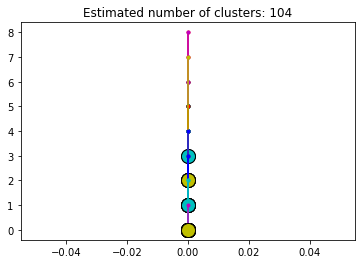

In [31]:
# Plot result
# import matplotlib.pyplot as plt
# from itertools import cycle

# plt.close("all")
# plt.figure(1)
# plt.clf()

# colors = cycle("bgrcmykbgrcmykbgrcmykbgrcmyk")
# for k, col in zip(range(n_clusters_), colors):
#     class_members = labels == k
#     cluster_center = X[cluster_centers_indices[k]]
    
#     plt.plot(X[class_members, 0], X[class_members, 1], col + ".")
#     plt.plot(
#         cluster_center[0],
#         cluster_center[1],
#         "o",
#         markerfacecolor=col,
#         markeredgecolor="k",
#         markersize=14,
#     )
#     for x in X[class_members]:
#         plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

# print(len(cluster_center))
# plt.title("Estimated number of clusters: %d" % n_clusters_)
# plt.show()

In [49]:
from sklearn.model_selection import GridSearchCV

In [58]:
parameters = {'damping':[x / 100.0 for x in range(50, 100, 1)], 'convergence_iter':[x for x in range(1, 170, 1)]}
clf = GridSearchCV(af, parameters, scoring='accuracy')

In [59]:
from sklearn import datasets
iris = datasets.load_iris()

In [ ]:
clf.fit(X, y)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:528: ConvergenceWarning: This model does not have any cluster centers because affinity propagation did not converge. Labeling every sample as '-1'.
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_affinity_propagation.py:528: ConvergenceWarning: This model does not have any cluster centers because affinity propagation did not converge. Labeling every sample as '-1'.
  warnings.warn(
/Users/admin/opt/anaconda3/lib/p

In [ ]:
sorted(clf.cv_results_.keys())